# Inspecting centralized optimization for f_global - gradient descent vs PI

- f_global as objective function to minimize 
- only 1 agent
- optimization algortihm = gradient descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt

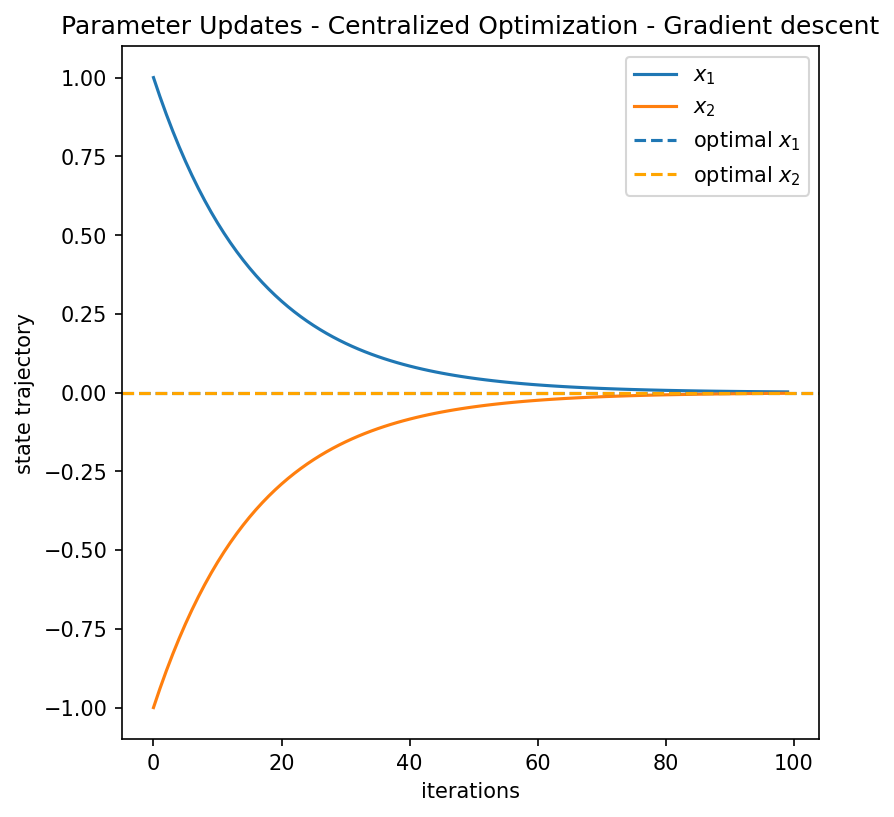

In [5]:
def gradient_vector_f_global_Autograd(x):

    import jax

    x1, x2 = x[0], x[1]

    f_partial_x1 = jax.grad(f_global, argnums= 0)
    f_partial_x2 = jax.grad(f_global, argnums= 1)

    return f_partial_x1(x1, x2), f_partial_x2(x1, x2)

def f_global(x1, x2): 
    
    return 0.05* x1**2 + 0.05* x2**2


optimal_x_1 = 0
optimal_x_2 = 0

n_iterations = 100


beta = 0.2
alpha = 3

learning_rate =  beta * alpha

x1, x2 = 1., -1.

history_x1 = []
history_x2 = []
for _ in range(n_iterations):
    
    history_x1.append(x1)
    history_x2.append(x2)
    
    x1 = x1 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[0]
    x2 = x2 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[1]


fig, ax = plt.subplots(figsize=(6, 6), dpi=150)

ax.plot(range(len(history_x1)), history_x1, label = "$x_1$")
ax.plot(range(len(history_x2)), history_x2, label = "$x_2$")

ax.axhline(y= optimal_x_1, linestyle='dashed', label= "optimal $x_1$")
ax.axhline(y= optimal_x_2, linestyle='dashed', label= "optimal $x_2$", color="orange")

ax.set_title("Parameter Updates - Centralized Optimization - Gradient descent")
ax.set_xlabel("iterations")
ax.set_ylabel("state trajectory")

ax.legend()
plt.show()


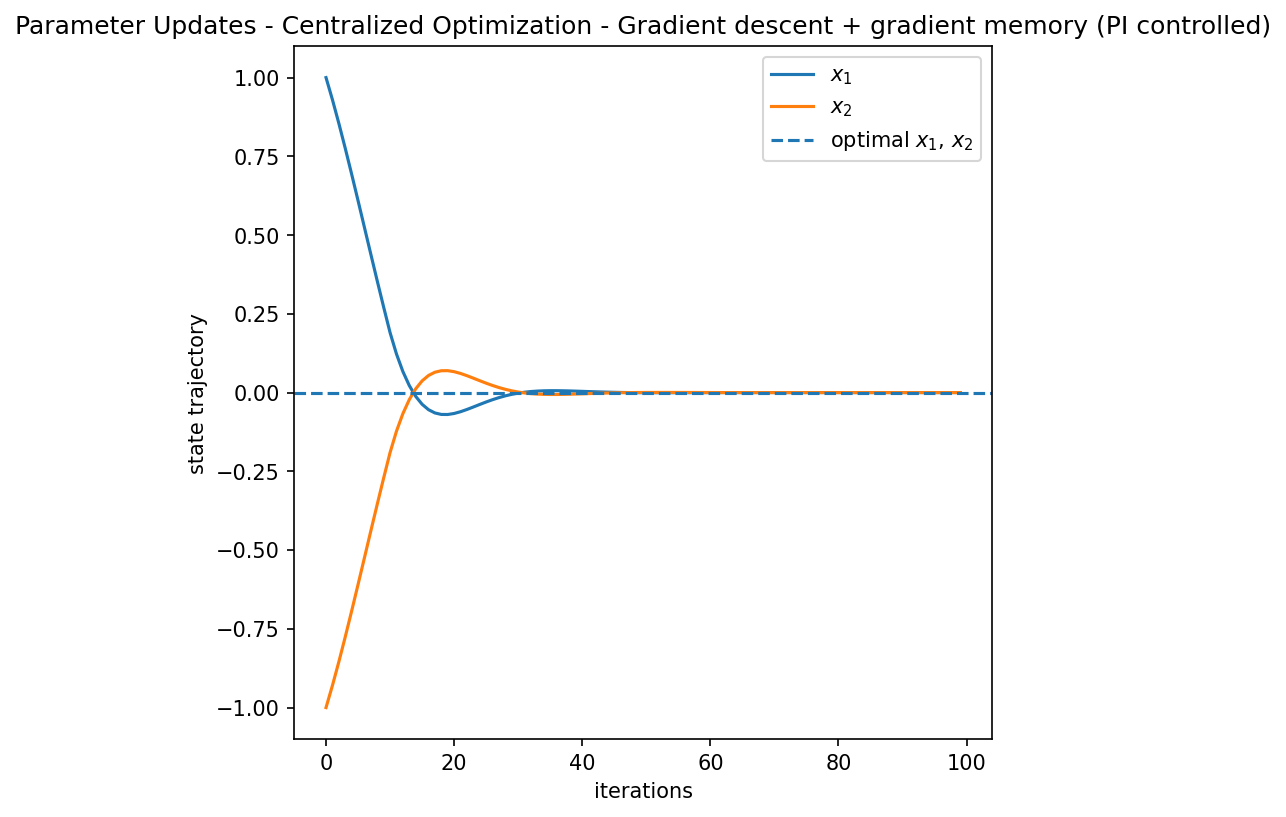

In [11]:
def gradient_vector_f_global_Autograd(x):

    import jax

    x1, x2 = x[0], x[1]

    f_partial_x1 = jax.grad(f_global, argnums= 0)
    f_partial_x2 = jax.grad(f_global, argnums= 1)

    return f_partial_x1(x1, x2), f_partial_x2(x1, x2)

def f_global(x1, x2): 
    
    return 0.05* x1**2 + 0.05* x2**2


optimal_x_1 = 0
optimal_x_2 = 0

n_iterations = 100


beta = 0.2
alpha = 3

learning_rate =  beta * alpha

x1, x2 = 1., -1.

history_x1 = []
history_x2 = []


beta_memory = 0.1
len_memory = 10

gradient_memory_x1 = len_memory * [0]
gradient_memory_x2 = len_memory * [0]


for _ in range(n_iterations):
    
    history_x1.append(x1)
    history_x2.append(x2)
    
    gradient_memory_x1[:-1], gradient_memory_x2[:-1] =  gradient_memory_x1[1:], gradient_memory_x2[1:]

    gradient_memory_x1[-1] = float(gradient_vector_f_global_Autograd([x1, x2])[0])
    gradient_memory_x2[-1] = float(gradient_vector_f_global_Autograd([x1, x2])[1])

    x1 = x1 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[0] - beta_memory * sum(gradient_memory_x1)
    x2 = x2 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[1] - beta_memory* sum(gradient_memory_x2)



fig, ax = plt.subplots(figsize=(6, 6), dpi=150)

ax.plot(range(len(history_x1)), history_x1, label = "$x_1$")
ax.plot(range(len(history_x2)), history_x2, label = "$x_2$")

ax.axhline(y= optimal_x_1, linestyle='dashed', label= "optimal $x_1$, $x_2$")

ax.set_title("Parameter Updates - Centralized Optimization - Gradient descent + gradient memory (PI controlled)")
ax.set_xlabel("iterations")
ax.set_ylabel("state trajectory")

ax.legend()
plt.show()


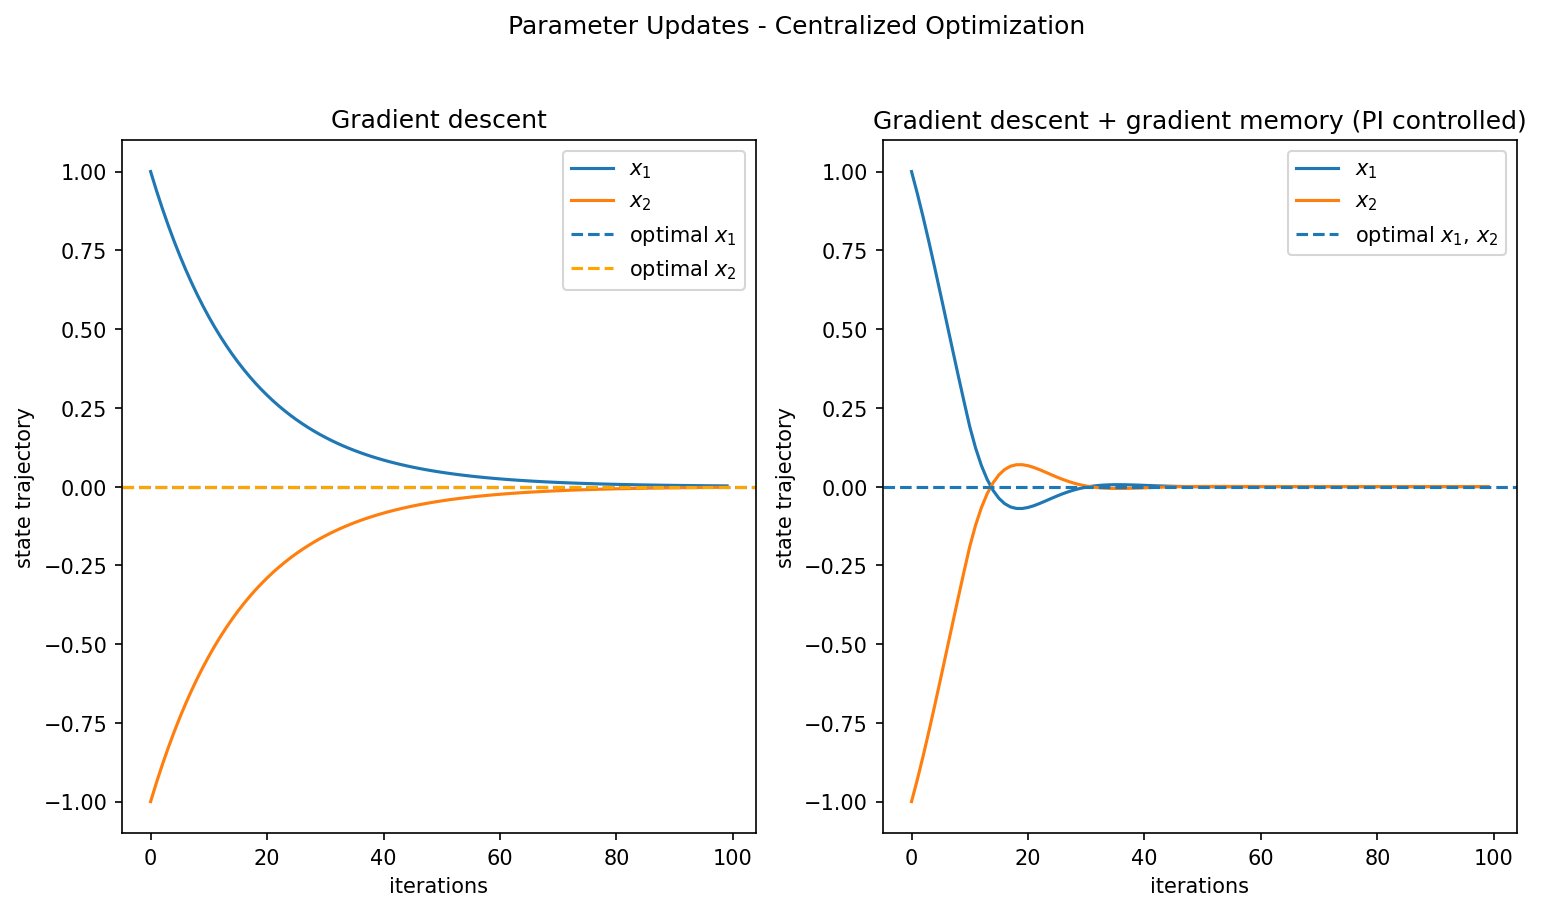

In [13]:
import matplotlib.pyplot as plt

def gradient_vector_f_global_Autograd(x):
    import jax

    x1, x2 = x[0], x[1]

    f_partial_x1 = jax.grad(f_global, argnums=0)
    f_partial_x2 = jax.grad(f_global, argnums=1)

    return f_partial_x1(x1, x2), f_partial_x2(x1, x2)

def f_global(x1, x2):
    return 0.05 * x1**2 + 0.05 * x2**2

optimal_x_1 = 0
optimal_x_2 = 0

n_iterations = 100

beta = 0.2
alpha = 3

learning_rate = beta * alpha

x1, x2 = 1., -1.

history_x1 = []
history_x2 = []
for _ in range(n_iterations):
    history_x1.append(x1)
    history_x2.append(x2)

    x1 = x1 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[0]
    x2 = x2 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[1]

fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=150)

# Plot for the first scenario
axs[0].plot(range(len(history_x1)), history_x1, label="$x_1$")
axs[0].plot(range(len(history_x2)), history_x2, label="$x_2$")
axs[0].axhline(y=optimal_x_1, linestyle='dashed', label="optimal $x_1$")
axs[0].axhline(y=optimal_x_2, linestyle='dashed', label="optimal $x_2$", color="orange")
axs[0].set_title("Gradient descent")
axs[0].set_xlabel("iterations")
axs[0].set_ylabel("state trajectory")
axs[0].legend()

# Plot for the second scenario
x1, x2 = 1., -1.
history_x1 = []
history_x2 = []
beta_memory = 0.1
len_memory = 10
gradient_memory_x1 = len_memory * [0]
gradient_memory_x2 = len_memory * [0]

for _ in range(n_iterations):
    history_x1.append(x1)
    history_x2.append(x2)

    gradient_memory_x1[:-1], gradient_memory_x2[:-1] = gradient_memory_x1[1:], gradient_memory_x2[1:]
    gradient_memory_x1[-1] = float(gradient_vector_f_global_Autograd([x1, x2])[0])
    gradient_memory_x2[-1] = float(gradient_vector_f_global_Autograd([x1, x2])[1])

    x1 = x1 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[0] - beta_memory * sum(gradient_memory_x1)
    x2 = x2 - learning_rate * gradient_vector_f_global_Autograd([x1, x2])[1] - beta_memory * sum(gradient_memory_x2)

axs[1].plot(range(len(history_x1)), history_x1, label="$x_1$")
axs[1].plot(range(len(history_x2)), history_x2, label="$x_2$")
axs[1].axhline(y=optimal_x_1, linestyle='dashed', label="optimal $x_1$, $x_2$")

fig.suptitle("Parameter Updates - Centralized Optimization", y=1.02)

axs[1].set_title("Gradient descent + gradient memory (PI controlled)")
axs[1].set_xlabel("iterations")
axs[1].set_ylabel("state trajectory")
axs[1].legend()
plt.show()


# Testing Wolf condiitons